In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def get_short_embedding(embedding):
    if embedding == 'FastText':
        return 'Fast'
    elif embedding == 'Wang2Vec':
        return 'Wang'
    elif embedding == 'Glove':
        return 'Glove'
    elif embedding == 'Word2Vec':
        return 'Word'
    else:
        return embedding

In [3]:
dados_df = pd.read_csv('Dados Portuguese Tagger - Results Summary.csv')
dados_df['Short Embedding'] = dados_df.apply(lambda row: get_short_embedding(row['Embedding']), axis=1)
dados_df

,Embedding,Tagging Scheme,Capitalisation Dim,Lower,Char LSTM Dim,Word LSTM Dim,Average F1 Score,Average F1 Score Without Outliers,Standard Deviation,Short Embedding
0,FastText,iob,False,False,25,100,53.71,53.71,1.76,Fast
1,FastText,iob,False,False,25,200,53.58,53.58,0.98,Fast
2,FastText,iob,False,False,50,100,54.78,54.97,1.62,Fast
3,FastText,iob,False,False,50,200,54.37,54.37,1.36,Fast
4,FastText,iob,True,True,25,100,62.93,63.43,2.29,Fast
5,FastText,iob,True,True,25,200,63.02,54.95,0.70,Fast
6,FastText,iob,True,True,50,100,63.66,63.66,0.82,Fast
7,FastText,iob,True,True,50,200,63.55,63.55,0.67,Fast
8,FastText,iobes,False,False,25,100,54.22,54.22,1.35,Fast
9,FastText,iobes,False,False,25,200,53.70,53.95,1.54,Fast


In [4]:
dados_df.columns.values

array(['Embedding', 'Tagging Scheme', 'Capitalisation Dim', 'Lower',
       'Char LSTM Dim', 'Word LSTM Dim', 'Average F1 Score',
       'Average F1 Score Without Outliers', 'Standard Deviation',
       'Short Embedding'], dtype=object)

In [5]:
dados_df.groupby('Embedding').describe(percentiles=[])

Average F1 Score                                             \
                     count       mean       std    min     50%    max   
Embedding                                                               
FastText              16.0  58.734375  4.779396  53.58  58.855  63.70   
Glove                 16.0  55.671250  4.236201  51.32  55.550  60.45   
Wang2Vec              16.0  58.960625  5.736395  51.32  58.980  64.92   
Word2Vec              16.0  55.859375  5.283428  50.23  55.920  61.68   

          Average F1 Score Without Outliers                              \
                                      count       mean       std    min   
Embedding                                                                 
FastText                               16.0  58.288125  4.733030  53.58   
Glove                                  16.0  55.665625  4.256731  51.32   
Wang2Vec                               16.0  59.155625  5.538603  53.00   
Word2Vec                               16.0  55.880625  5.291499  50.23   

                        Char LSTM Dim                                     \
             50%    max         count  mean        std   min   50%   max   
Embedding                                                                  
FastText   54.96  63.70          16.0  37.5  12.909944  25.0  37.5  50.0   
Glove      55.50  60.64          16.0  37.5  12.909944  25.0  37.5  50.0   
Wang2Vec   59.20  64.92          16.0  37.5  12.909944  25.0  37.5  50.0   
Word2Vec   55.92  61.75          16.0  37.5  12.909944  25.0  37.5  50.0   

          Standard Deviation                                          \
                       count      mean       std   min    50%    max   
Embedding                                                              
FastText                16.0  1.262500  0.430573  0.67  1.285   2.29   
Glove                   16.0  1.213125  0.259094  0.81  1.215   1.61   
Wang2Vec                16.0  1.799375  2.683273  0.64  1.030  11.75   
Word2Vec                16.0  1.265625  0.370585  0.68  1.230   1.81   

          Word LSTM Dim                                         
                  count   mean        std    min    50%    max  
Embedding                                                       
FastText           16.0  150.0  51.639778  100.0  150.0  200.0  
Glove              16.0  150.0  51.639778  100.0  150.0  200.0  
Wang2Vec           16.0  150.0  51.639778  100.0  150.0  200.0  
Word2Vec           16.0  150.0  51.639778  100.0  150.0  200.0

In [6]:
dados_df.pivot_table(columns=['Embedding'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                          \
Embedding                            FastText       Glove    Wang2Vec   
Average F1 Score                    58.734375   55.671250   58.960625   
Average F1 Score Without Outliers   58.288125   55.665625   59.155625   
Capitalisation Dim                   0.500000    0.500000    0.500000   
Char LSTM Dim                       37.500000   37.500000   37.500000   
Lower                                0.500000    0.500000    0.500000   
Short Embedding                           NaN         NaN         NaN   
Standard Deviation                   1.262500    1.213125    1.799375   
Tagging Scheme                            NaN         NaN         NaN   
Word LSTM Dim                      150.000000  150.000000  150.000000   

                                                  amax                  \
Embedding                            Word2Vec FastText  Glove Wang2Vec   
Average F1 Score                    55.859375     63.7  60.45    64.92   
Average F1 Score Without Outliers   55.880625     63.7  60.64    64.92   
Capitalisation Dim                   0.500000     True   True     True   
Char LSTM Dim                       37.500000       50     50       50   
Lower                                0.500000     True   True     True   
Short Embedding                           NaN     Fast  Glove     Wang   
Standard Deviation                   1.265625     2.29   1.61    11.75   
Tagging Scheme                            NaN    iobes  iobes    iobes   
Word LSTM Dim                      150.000000      200    200      200   

                                               amin                           \
Embedding                         Word2Vec FastText  Glove Wang2Vec Word2Vec   
Average F1 Score                     61.68    53.58  51.32    51.32    50.23   
Average F1 Score Without Outliers    61.75    53.58  51.32       53    50.23   
Capitalisation Dim                    True    False  False    False    False   
Char LSTM Dim                           50       25     25       25       25   
Lower                                 True    False  False    False    False   
Short Embedding                       Word     Fast  Glove     Wang     Word   
Standard Deviation                    1.81     0.67   0.81     0.64     0.68   
Tagging Scheme                       iobes      iob    iob      iob      iob   
Word LSTM Dim                          200      100    100      100      100   

                                         std                                   
Embedding                           FastText      Glove   Wang2Vec   Word2Vec  
Average F1 Score                    4.779396   4.236201   5.736395   5.283428  
Average F1 Score Without Outliers   4.733030   4.256731   5.538603   5.291499  
Capitalisation Dim                  0.516398   0.516398   0.516398   0.516398  
Char LSTM Dim                      12.909944  12.909944  12.909944  12.909944  
Lower                               0.516398   0.516398   0.516398   0.516398  
Short Embedding                          NaN        NaN        NaN        NaN  
Standard Deviation                  0.430573   0.259094   2.683273   0.370585  
Tagging Scheme                           NaN        NaN        NaN        NaN  
Word LSTM Dim                      51.639778  51.639778  51.639778  51.639778

In [7]:
dados_df.pivot_table(columns=['Lower'], aggfunc=[np.mean, np.max, np.min])

mean               amax            \
Lower                                False    True      False     True    
Average F1 Score                   52.4797  62.1331     54.78     64.92   
Average F1 Score Without Outliers    52.58   61.915     54.97     64.92   
Capitalisation Dim                   False     True     False      True   
Char LSTM Dim                         37.5     37.5        50        50   
Embedding                              NaN      NaN  Word2Vec  Word2Vec   
Short Embedding                        NaN      NaN      Word      Word   
Standard Deviation                 1.73781   1.0325     11.75      2.29   
Tagging Scheme                         NaN      NaN     iobes     iobes   
Word LSTM Dim                          150      150       200       200   

                                       amin            
Lower                                 False     True   
Average F1 Score                      50.23     59.32  
Average F1 Score Without Outliers     50.23     54.95  
Capitalisation Dim                    False      True  
Char LSTM Dim                            25        25  
Embedding                          FastText  FastText  
Short Embedding                        Fast      Fast  
Standard Deviation                     0.95      0.64  
Tagging Scheme                          iob       iob  
Word LSTM Dim                           100       100

In [8]:
dados_df.pivot_table(columns=['Tagging Scheme'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax            \
Tagging Scheme                            iob       iobes       iob     iobes   
Average F1 Score                    57.462188   57.150625     64.92     64.63   
Average F1 Score Without Outliers   57.242500   57.252500     64.92     64.63   
Capitalisation Dim                   0.500000    0.500000      True      True   
Char LSTM Dim                       37.500000   37.500000        50        50   
Embedding                                 NaN         NaN  Word2Vec  Word2Vec   
Lower                                0.500000    0.500000      True      True   
Short Embedding                           NaN         NaN      Word      Word   
Standard Deviation                   1.165000    1.605312      2.29     11.75   
Word LSTM Dim                      150.000000  150.000000       200       200   

                                       amin                  std             
Tagging Scheme                          iob     iobes        iob      iobes  
Average F1 Score                      50.72     50.23   5.216638   5.179543  
Average F1 Score Without Outliers     50.82     50.23   5.143560   5.122152  
Capitalisation Dim                    False     False   0.508001   0.508001  
Char LSTM Dim                            25        25  12.700013  12.700013  
Embedding                          FastText  FastText        NaN        NaN  
Lower                                 False     False   0.508001   0.508001  
Short Embedding                        Fast      Fast        NaN        NaN  
Standard Deviation                     0.67      0.64   0.396826   1.879873  
Word LSTM Dim                           100       100  50.800051  50.800051

In [9]:
dados_df.pivot_table(columns=['Char LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax            \
Char LSTM Dim                              25          50        25        50   
Average F1 Score                    57.216875   57.395938     64.92     64.72   
Average F1 Score Without Outliers   57.078750   57.416250     64.92     64.72   
Capitalisation Dim                   0.500000    0.500000      True      True   
Embedding                                 NaN         NaN  Word2Vec  Word2Vec   
Lower                                0.500000    0.500000      True      True   
Short Embedding                           NaN         NaN      Word      Word   
Standard Deviation                   1.461562    1.308750     11.75      2.18   
Tagging Scheme                            NaN         NaN     iobes     iobes   
Word LSTM Dim                      150.000000  150.000000       200       200   

                                       amin                  std             
Char LSTM Dim                            25        50         25         50  
Average F1 Score                      50.23     50.27   5.325894   5.070443  
Average F1 Score Without Outliers     50.23     50.27   5.181064   5.078433  
Capitalisation Dim                    False     False   0.508001   0.508001  
Embedding                          FastText  FastText        NaN        NaN  
Lower                                 False     False   0.508001   0.508001  
Short Embedding                        Fast      Fast        NaN        NaN  
Standard Deviation                     0.64      0.67   1.912378   0.349597  
Tagging Scheme                          iob       iob        NaN        NaN  
Word LSTM Dim                           100       100  50.800051  50.800051

In [10]:
dados_df.pivot_table(columns=['Word LSTM Dim'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                 amax            \
Word LSTM Dim                            100        200       100       200   
Average F1 Score                   57.411250  57.201563     64.92     64.75   
Average F1 Score Without Outliers  57.445313  57.049687     64.92     64.75   
Capitalisation Dim                  0.500000   0.500000      True      True   
Char LSTM Dim                      37.500000  37.500000        50        50   
Embedding                                NaN        NaN  Word2Vec  Word2Vec   
Lower                               0.500000   0.500000      True      True   
Short Embedding                          NaN        NaN      Word      Word   
Standard Deviation                  1.239062   1.531250      2.29     11.75   
Tagging Scheme                           NaN        NaN     iobes     iobes   

                                       amin                  std             
Word LSTM Dim                           100       200        100        200  
Average F1 Score                      50.23     50.25   5.133997   5.264074  
Average F1 Score Without Outliers     50.23     50.25   5.145678   5.112134  
Capitalisation Dim                    False     False   0.508001   0.508001  
Char LSTM Dim                            25        25  12.700013  12.700013  
Embedding                          FastText  FastText        NaN        NaN  
Lower                                 False     False   0.508001   0.508001  
Short Embedding                        Fast      Fast        NaN        NaN  
Standard Deviation                     0.68      0.64   0.369056   1.900314  
Tagging Scheme                          iob       iob        NaN        NaN

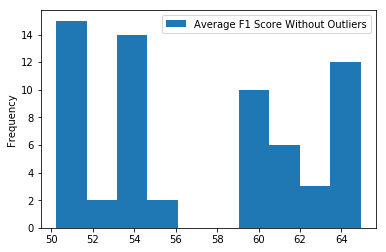

In [11]:
dados_df.plot(kind='hist', x='Embedding', y='Average F1 Score Without Outliers')

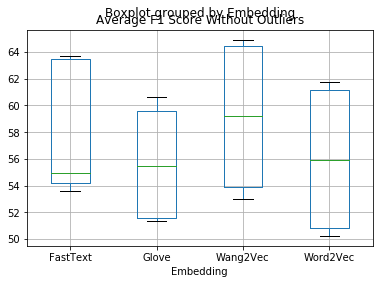

In [12]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Embedding')

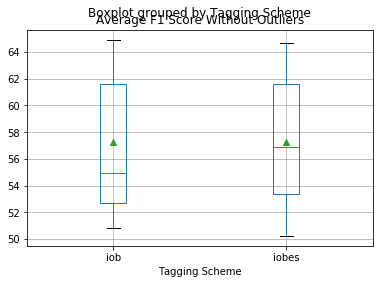

In [13]:
tagging_scheme_axes = dados_df.boxplot(column='Average F1 Score Without Outliers', by='Tagging Scheme', showmeans=True, return_type='axes')

In [14]:
lower_plot = dados_df.boxplot(column='Average F1 Score Without Outliers', by='Lower', showmeans=True, ax=tagging_scheme_axes)

/home/pedro/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5847: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


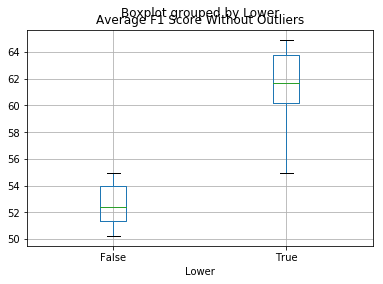

In [15]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Lower')

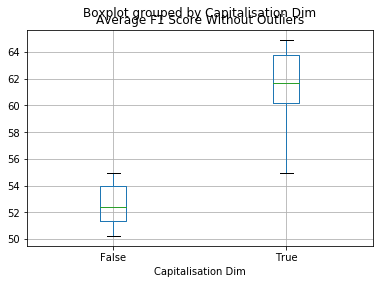

In [16]:
plot = dados_df.boxplot(column='Average F1 Score Without Outliers', by='Capitalisation Dim')
fig = plot.figure
fig.savefig('cap_dim.png')

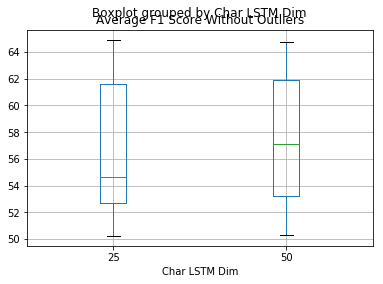

In [17]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Char LSTM Dim')

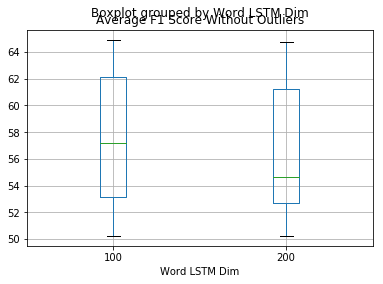

In [18]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Word LSTM Dim')

In [19]:
dados_lower_df = dados_df[dados_df['Lower'] == True]
del dados_lower_df['Capitalisation Dim']
del dados_lower_df['Lower']
del dados_lower_df['Average F1 Score']
dados_lower_df

,Embedding,Tagging Scheme,Char LSTM Dim,Word LSTM Dim,Average F1 Score Without Outliers,Standard Deviation,Short Embedding
4,FastText,iob,25,100,63.43,2.29,Fast
5,FastText,iob,25,200,54.95,0.70,Fast
6,FastText,iob,50,100,63.66,0.82,Fast
7,FastText,iob,50,200,63.55,0.67,Fast
12,FastText,iobes,25,100,63.13,0.81,Fast
13,FastText,iobes,25,200,63.65,1.09,Fast
14,FastText,iobes,50,100,63.15,1.36,Fast
15,FastText,iobes,50,200,63.70,1.22,Fast
20,Wang2Vec,iob,25,100,64.92,0.77,Wang
21,Wang2Vec,iob,25,200,64.75,0.91,Wang


In [20]:
dados_lower_df.pivot_table(columns=['Embedding'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                                   \
Embedding                          FastText      Glove   Wang2Vec   Word2Vec   
Average F1 Score Without Outliers   62.4025   59.77375   64.50875   60.97500   
Char LSTM Dim                       37.5000   37.50000   37.50000   37.50000   
Short Embedding                         NaN        NaN        NaN        NaN   
Standard Deviation                   1.1200    1.01750    0.99875    0.99375   
Tagging Scheme                          NaN        NaN        NaN        NaN   
Word LSTM Dim                      150.0000  150.00000  150.00000  150.00000   

                                      amax                              amin  \
Embedding                         FastText  Glove Wang2Vec Word2Vec FastText   
Average F1 Score Without Outliers     63.7  60.64    64.92    61.75    54.95   
Char LSTM Dim                           50     50       50       50       25   
Short Embedding                       Fast  Glove     Wang     Word     Fast   
Standard Deviation                    2.29   1.35     2.18     1.41     0.67   
Tagging Scheme                       iobes  iobes    iobes    iobes      iob   
Word LSTM Dim                          200    200      200      200      100   

                                                                  std  \
Embedding                          Glove Wang2Vec Word2Vec   FastText   
Average F1 Score Without Outliers  59.22    64.07    60.17   3.019493   
Char LSTM Dim                         25       25       25  13.363062   
Short Embedding                    Glove     Wang     Word        NaN   
Standard Deviation                  0.81     0.64     0.68   0.534843   
Tagging Scheme                       iob      iob      iob        NaN   
Word LSTM Dim                        100      100      100  53.452248   

                                                                    
Embedding                              Glove   Wang2Vec   Word2Vec  
Average F1 Score Without Outliers   0.477791   0.287623   0.636822  
Char LSTM Dim                      13.363062  13.363062  13.363062  
Short Embedding                          NaN        NaN        NaN  
Standard Deviation                  0.182346   0.496658   0.254443  
Tagging Scheme                           NaN        NaN        NaN  
Word LSTM Dim                      53.452248  53.452248  53.452248

In [21]:
dados_lower_df.pivot_table(columns=['Tagging Scheme'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax            \
Tagging Scheme                            iob       iobes       iob     iobes   
Average F1 Score Without Outliers   61.878125   61.951875     64.92     64.63   
Char LSTM Dim                       37.500000   37.500000        50        50   
Embedding                                 NaN         NaN  Word2Vec  Word2Vec   
Short Embedding                           NaN         NaN      Word      Word   
Standard Deviation                   0.948125    1.116875      2.29      2.18   
Word LSTM Dim                      150.000000  150.000000       200       200   

                                       amin                  std             
Tagging Scheme                          iob     iobes        iob      iobes  
Average F1 Score Without Outliers     54.95      59.4   2.643639   2.056392  
Char LSTM Dim                            25        25  12.909944  12.909944  
Embedding                          FastText  FastText        NaN        NaN  
Short Embedding                        Fast      Fast        NaN        NaN  
Standard Deviation                     0.67      0.64   0.403835   0.348821  
Word LSTM Dim                           100       100  51.639778  51.639778

In [22]:
dados_df.groupby(['Embedding']).describe(percentiles=[])

Average F1 Score                                             \
                     count       mean       std    min     50%    max   
Embedding                                                               
FastText              16.0  58.734375  4.779396  53.58  58.855  63.70   
Glove                 16.0  55.671250  4.236201  51.32  55.550  60.45   
Wang2Vec              16.0  58.960625  5.736395  51.32  58.980  64.92   
Word2Vec              16.0  55.859375  5.283428  50.23  55.920  61.68   

          Average F1 Score Without Outliers                              \
                                      count       mean       std    min   
Embedding                                                                 
FastText                               16.0  58.288125  4.733030  53.58   
Glove                                  16.0  55.665625  4.256731  51.32   
Wang2Vec                               16.0  59.155625  5.538603  53.00   
Word2Vec                               16.0  55.880625  5.291499  50.23   

                        Char LSTM Dim                                     \
             50%    max         count  mean        std   min   50%   max   
Embedding                                                                  
FastText   54.96  63.70          16.0  37.5  12.909944  25.0  37.5  50.0   
Glove      55.50  60.64          16.0  37.5  12.909944  25.0  37.5  50.0   
Wang2Vec   59.20  64.92          16.0  37.5  12.909944  25.0  37.5  50.0   
Word2Vec   55.92  61.75          16.0  37.5  12.909944  25.0  37.5  50.0   

          Standard Deviation                                          \
                       count      mean       std   min    50%    max   
Embedding                                                              
FastText                16.0  1.262500  0.430573  0.67  1.285   2.29   
Glove                   16.0  1.213125  0.259094  0.81  1.215   1.61   
Wang2Vec                16.0  1.799375  2.683273  0.64  1.030  11.75   
Word2Vec                16.0  1.265625  0.370585  0.68  1.230   1.81   

          Word LSTM Dim                                         
                  count   mean        std    min    50%    max  
Embedding                                                       
FastText           16.0  150.0  51.639778  100.0  150.0  200.0  
Glove              16.0  150.0  51.639778  100.0  150.0  200.0  
Wang2Vec           16.0  150.0  51.639778  100.0  150.0  200.0  
Word2Vec           16.0  150.0  51.639778  100.0  150.0  200.0

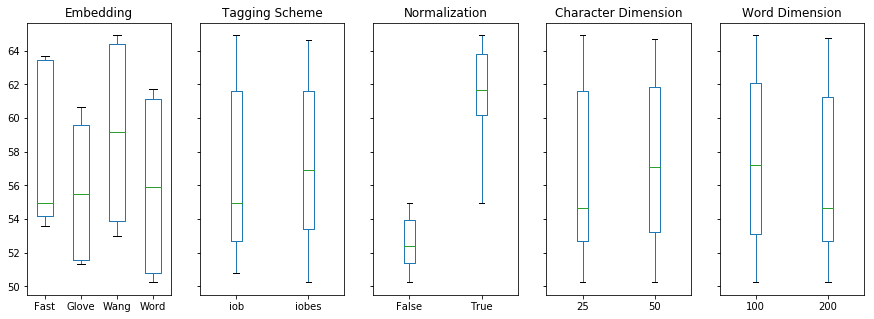

In [23]:
cols_alias = {'Short Embedding': 'Embedding', 'Tagging Scheme': 'Tagging Scheme', 'Lower': 'Normalization', 'Char LSTM Dim': 'Character Dimension', 'Word LSTM Dim': 'Word Dimension'}
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

for idx, column in enumerate(cols_alias.keys()):
    idf = dados_df[['Average F1 Score Without Outliers',column]].pivot(columns=column)
    #print(idf)
    
    idf.plot.box(ax=axes[idx])
    axes[idx].set_title(cols_alias.get(column))
    axes[idx].set_xticklabels([e[1] for e in idf.columns])

plt.show()
fig.savefig('parameters_box_plots.png')

In [24]:
dados_wang2vec_lower_df = dados_lower_df[dados_df['Embedding'] == 'Wang2Vec']
del dados_wang2vec_lower_df['Embedding']
dados_wang2vec_lower_df

/home/pedro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Tagging Scheme,Char LSTM Dim,Word LSTM Dim,Average F1 Score Without Outliers,Standard Deviation,Short Embedding
20,iob,25,100,64.92,0.77,Wang
21,iob,25,200,64.75,0.91,Wang
22,iob,50,100,64.34,0.68,Wang
23,iob,50,200,64.72,0.80,Wang
28,iobes,25,100,64.63,1.03,Wang
29,iobes,25,200,64.31,0.64,Wang
30,iobes,50,100,64.33,0.98,Wang
31,iobes,50,200,64.07,2.18,Wang


In [25]:
dados_wang2vec_lower_df.pivot_table(columns=['Tagging Scheme'], aggfunc=[np.mean, np.max, np.min, np.std])

mean             amax          amin  \
Tagging Scheme                          iob     iobes    iob  iobes    iob   
Average F1 Score Without Outliers   64.6825   64.3350  64.92  64.63  64.34   
Char LSTM Dim                       37.5000   37.5000     50     50     25   
Short Embedding                         NaN       NaN   Wang   Wang   Wang   
Standard Deviation                   0.7900    1.2075   0.91   2.18   0.68   
Word LSTM Dim                      150.0000  150.0000    200    200    100   

                                                std             
Tagging Scheme                     iobes        iob      iobes  
Average F1 Score Without Outliers  64.07   0.244728   0.229420  
Char LSTM Dim                         25  14.433757  14.433757  
Short Embedding                     Wang        NaN        NaN  
Standard Deviation                  0.64   0.094868   0.671087  
Word LSTM Dim                        100  57.735027  57.735027

In [26]:
dados_wang2vec_lower_df.groupby(['Char LSTM Dim', 'Word LSTM Dim']).describe(percentiles=[])

Average F1 Score Without Outliers          \
                                                        count    mean   
Char LSTM Dim Word LSTM Dim                                             
25            100                                         2.0  64.775   
              200                                         2.0  64.530   
50            100                                         2.0  64.335   
              200                                         2.0  64.395   

                                                             \
                                  std    min     50%    max   
Char LSTM Dim Word LSTM Dim                                   
25            100            0.205061  64.63  64.775  64.92   
              200            0.311127  64.31  64.530  64.75   
50            100            0.007071  64.33  64.335  64.34   
              200            0.459619  64.07  64.395  64.72   

                            Standard Deviation                                \
                                         count   mean       std   min    50%   
Char LSTM Dim Word LSTM Dim                                                    
25            100                          2.0  0.900  0.183848  0.77  0.900   
              200                          2.0  0.775  0.190919  0.64  0.775   
50            100                          2.0  0.830  0.212132  0.68  0.830   
              200                          2.0  1.490  0.975807  0.80  1.490   

                                   
                              max  
Char LSTM Dim Word LSTM Dim        
25            100            1.03  
              200            0.91  
50            100            0.98  
              200            2.18